In [1]:
#We import the necessary libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression






c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')


In [3]:
df_seq_HFiltNorm.head()
df_seq_HFiltNorm.shape

(3000, 182)

In [4]:
df_seq_HfiltNormT = df_seq_HFiltNorm.T
df_seq_HfiltNormT.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


In [51]:
#we now add the target variable
df_metaH_path = '../ai_lab/SmartSeq/HCC1806_SmartS_MetaData.tsv'
df_metaH = pd.read_csv(df_metaH_path, delimiter='\t')
df_metaH.set_index('Filename', inplace=True)

def add_target_column(data, metadata_path, target_column_name, target_category):
    df_meta = pd.read_csv(metadata_path, delimiter='\t')
    df_meta.set_index('Filename', inplace=True)
    merged_transition = pd.merge(data, df_meta[target_column_name], left_index=True, right_index=True)
    dummy_variables = pd.get_dummies(merged_transition[target_column_name], prefix='category').astype('int')
    
    # Set the target category to 1 and the others to 0
    dummy_variables['Target'] = dummy_variables[target_category]
    dummy_variables.drop(columns=[col for col in dummy_variables.columns if col != 'Target'], inplace=True)
    
    merged_data = pd.concat([merged_transition, dummy_variables], axis=1)
    merged_data.drop(columns=[target_column_name], inplace=True)
    return merged_data

In [53]:
merged = add_target_column(df_seq_HfiltNormT, df_metaH_path, 'Condition', 'category_Normo')

In [55]:
merged.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2,Target
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,10,136,0,0,29,0,29,0,0,1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,0,264,0,134,68,0,213,0,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,0,38,0,0,0,0,92,0,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,0,16,0,4,1,0,1,0,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,1,25,0,0,0,0,128,0,0,0


In [56]:
X = merged.drop(columns=['Target'])
y = merged['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
kfold = KFold(n_splits=5, shuffle=True, random_state=123)


In [26]:
# Define the parameter grid
param_grid = {
    'max_depth': range(3, 10),
    'learning_rate': np.linspace(0.1, 1, 10),
    'n_estimators': range(10, 110, 10),
    'gamma': np.linspace(0, 0.5, 5),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'min_child_weight': range(1, 6),
    'scale_pos_weight': range(1, 6)
}

xg_cl = XGBClassifier()


# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(xg_cl, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                    n_jobs=-1, cv=kfold, random_state=123)

# Fit the model
random_search.fit(X, y)

# Print the best parameters
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)

{'subsample': 0.7, 'scale_pos_weight': 2, 'n_estimators': 90, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.6, 'gamma': 0.25, 'colsample_bytree': 0.7}
0.9891891891891891
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Accuracy: 1.0


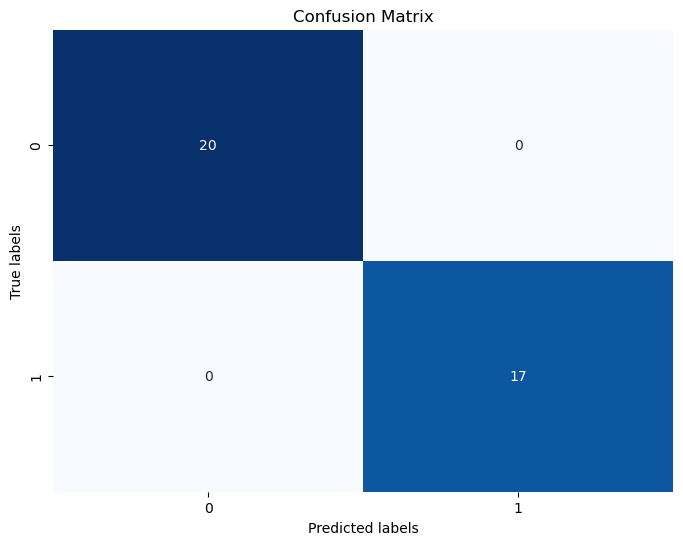

<Figure size 1000x600 with 0 Axes>

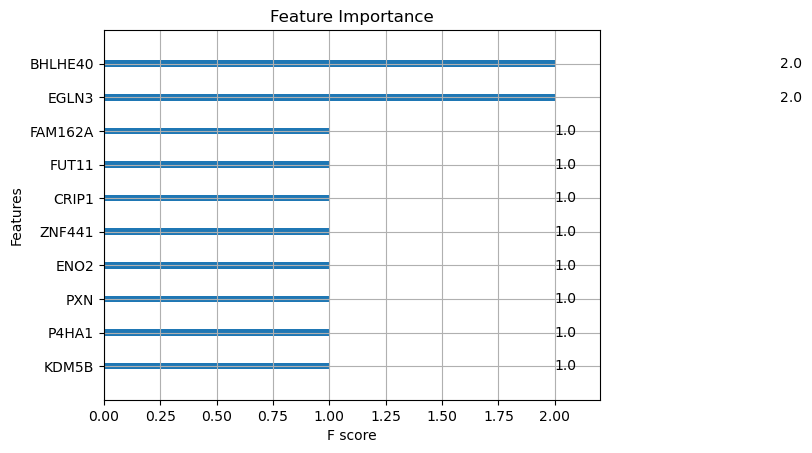

In [27]:
#Now we implement the best model
xg_cl = xgb.XGBClassifier(objective='binary:logistic', **random_search.best_params_)

# Train the model
xg_cl.fit(X_train, y_train)

# Make predictions on the test set
predictions = xg_cl.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xg_cl, max_num_features=10)  # You can adjust max_num_features as per your preference
plt.title("Feature Importance")
plt.show()



nota: AN GPTL4 PGK1 SONO IMPORTNTI VERMNETE, L HA DETTO LEI

In [34]:
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

# Instantiate Gridsearch
grid_search = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy',
                           n_jobs=-1, cv=kfold)

# Fit the model
grid_search.fit(X, y)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.9669669669669669
KNeighborsClassifier(metric='euclidean', n_neighbors=2)


c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 1.0


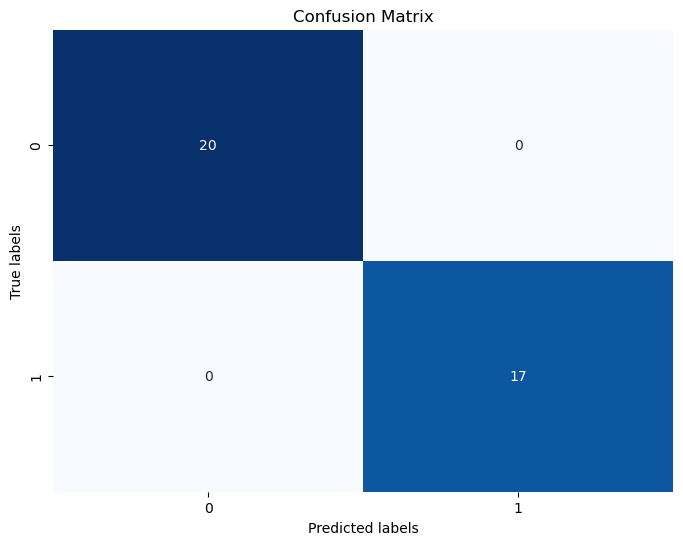

c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

Accuracy: [1.         0.94594595 0.94444444 0.94444444 1.        ]
Average accuracy: 0.9669669669669669


c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [35]:

knn = KNeighborsClassifier(**grid_search.best_params_)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print the accuracy
print("Accuracy:", knn_accuracy)

# Perform k-fold cross-validation
cv_results = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')

# Print the results
print('Accuracy:', cv_results)
print('Average accuracy:', cv_results.mean())

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()





Text(0.5, 0.92, '3D Scatter plot of two genes')

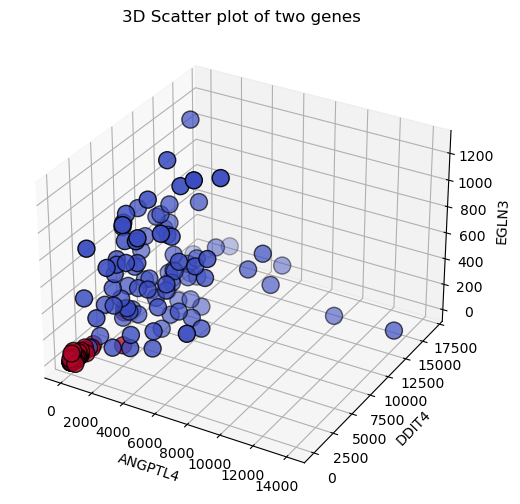

In [44]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X['ANGPTL4'], X['DDIT4'], X['EGLN3'], c=y, cmap='coolwarm', edgecolor='k', s=150)

# Set labels and title
ax.set_xlabel('ANGPTL4')
ax.set_ylabel('DDIT4')
ax.set_zlabel('EGLN3')
ax.set_title('3D Scatter plot of two genes')

In [48]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.linspace(0.1, 1, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg = LogisticRegression()

random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                    n_jobs=-1, cv=kfold, random_state=123)


# Fit the model

random_search.fit(X, y)

# Print the best parameters
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)

c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 44

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.9}
0.9945945945945945
LogisticRegression(C=0.9, penalty='l1', solver='liblinear')


Accuracy: 1.0


c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

Accuracy: [1.         0.94594595 0.94444444 0.94444444 1.        ]
Average accuracy: 0.9669669669669669


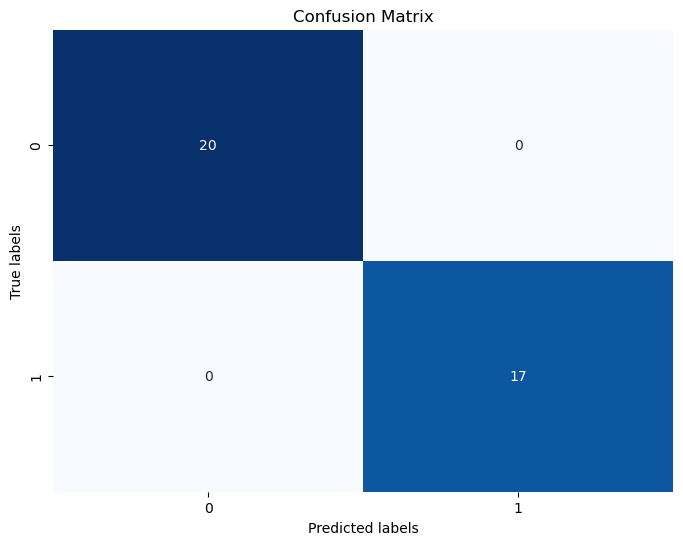

In [49]:
# Instantiate the Logistic Regression classifier
log_reg = LogisticRegression(**random_search.best_params_)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
log_reg_predictions = log_reg.predict(X_test)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Print the accuracy
print("Accuracy:", log_reg_accuracy)

# Perform k-fold cross-validation
cv_results = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')

# Print the results
print('Accuracy:', cv_results)
print('Average accuracy:', cv_results.mean())

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, log_reg_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        17

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



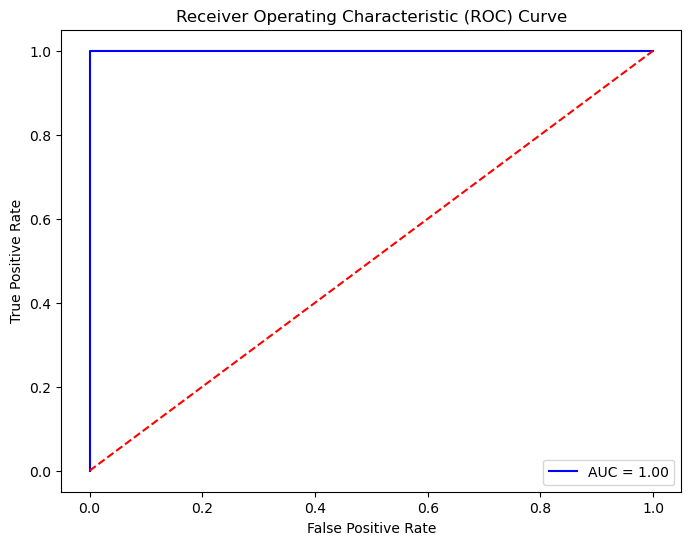

In [50]:

# Print classification report
print("Classification Report:")
print(classification_report(y_test, log_reg_predictions))

# Plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_reg_probs)
auc = roc_auc_score(y_test, log_reg_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
